In [36]:
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

In [7]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

x = np.array([8.093607318, 3.365731514])

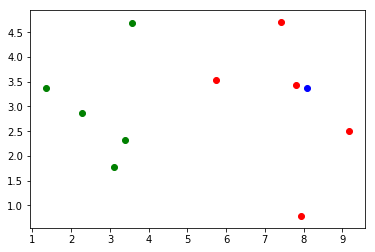

In [8]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.scatter(x[0], x[1], color='b')

In [14]:

distances = []
for item in raw_data_X:
    dist = np.sum(np.square(item - x))
    distances.append(np.sqrt(dist))
print(distances)

for value, label in zip(distances, raw_data_y):
    print(label, '  ', value)

    

[4.812566907609877, 5.229270827235305, 6.749798999160064, 4.6986266144110695, 5.83460014556857, 1.4900114024329525, 2.354574897431513, 1.3761132675144652, 0.3064319992975, 2.5786840957478887]
0    4.812566907609877
0    5.229270827235305
0    6.749798999160064
0    4.6986266144110695
0    5.83460014556857
1    1.4900114024329525
1    2.354574897431513
1    1.3761132675144652
1    0.3064319992975
1    2.5786840957478887


In [24]:
rank = np.argsort(distances)

k = 6

topK_y = [raw_data_y[i]  for i in rank[:k]]
print(topK_y)

[1, 1, 1, 1, 1, 0]


In [31]:


votes = Counter(topK_y)
votes.most_common(1)[0][0]

1

# 封装KNN算法


In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [17]:
X_predict = x.reshape(1, -1)
kNN_classifier.predict(X_predict)[0]

1

# KNN

In [25]:
class KNNClassifier:
    def __init__(self, k):
        
        assert k >=1, "K must be valid"
        self.k = k 
        self._X_train = None
        self._y_train = None
    
    def fit(self, X_train , y_train):
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert self.k <= X_train.shape[0], \
            "the size of X_train must be at least k."
        
        self._X_train = X_train
        self._y_train = y_train
        
        return self
    
    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self._X_train is not None and self._y_train is not None, \
                "must fit before predi ct!"
        assert X_predict.shape[1] == self._X_train.shape[1], \
                "the feature number of X_predict must be equal to X_train"
        
        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)
    
    def _predict(self, x):
        assert x.shape[0] == self._X_train.shape[1], \
            "the feature number of x must be equal to X_train"
        
        distances = [sqrt(np.sum((x_train - x) ** 2))
                     for x_train in self._X_train]
        nearest = np.argsort(distances)

        topK_y = [self._y_train[i] for i in nearest[:self.k]]
        votes = Counter(topK_y)

        return votes.most_common(1)[0][0]
    def __repr__(self):
        return "KNN(k=%d)" % self.k

In [27]:
from sklearn import datasets

digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

# 最值归一化

In [28]:
x= np.random.randint(0, 100, size=100)

In [30]:
(x - np.min(x)) /(np.max(x) - np.min(x))

array([0.92857143, 0.82653061, 0.42857143, 0.24489796, 0.62244898,
       0.53061224, 0.6122449 , 0.05102041, 0.65306122, 0.92857143,
       0.12244898, 0.67346939, 0.76530612, 0.76530612, 0.70408163,
       0.94897959, 0.83673469, 0.33673469, 0.08163265, 0.06122449,
       0.48979592, 0.62244898, 0.36734694, 0.35714286, 0.59183673,
       0.2244898 , 0.37755102, 0.3877551 , 0.51020408, 0.2755102 ,
       0.78571429, 0.09183673, 0.15306122, 0.18367347, 0.73469388,
       0.43877551, 0.07142857, 0.98979592, 0.60204082, 0.81632653,
       0.78571429, 0.68367347, 0.42857143, 0.29591837, 1.        ,
       0.6122449 , 0.35714286, 0.60204082, 0.89795918, 0.05102041,
       0.43877551, 0.51020408, 0.87755102, 0.58163265, 0.79591837,
       0.02040816, 0.36734694, 0.        , 0.91836735, 0.43877551,
       0.17346939, 0.52040816, 0.83673469, 0.21428571, 0.47959184,
       0.74489796, 0.76530612, 0.52040816, 1.        , 0.06122449,
       0.60204082, 0.13265306, 0.24489796, 0.60204082, 0.29591

In [31]:
X2 = np.random.randint(0,  100, (50, 2))
X2 = np.array(X2, dtype=float)

In [32]:
X2[:, 0] = (X2[:,0] - np.mean(X2[:,0]) ) /np.std(X2[:, 0])
X2[:, 1] = (X2[:,1] - np.mean(X2[:,1]) ) /np.std(X2[:, 1])

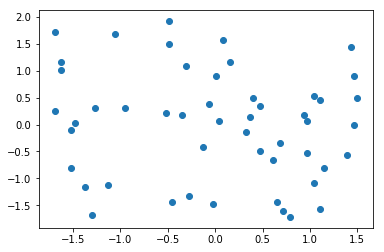

In [33]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [34]:
iris = datasets.load_iris()

In [35]:
X = iris.data
y = iris.target

In [50]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [51]:
from sklearn.preprocessing import StandardScaler
standarScaler = StandardScaler()

In [52]:
standarScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
standarScaler.mean_

array([5.79642857, 3.04017857, 3.6625    , 1.14464286])

In [54]:
X_train = standarScaler.transform(X_train)

In [55]:
X_test_standard = standarScaler.transform(X_test)

In [56]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [57]:
knn_clf.score(X_test_standard, y_test)

0.9736842105263158

# 归一化

In [ ]:
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.scale_ = None;
        
    def fit(self, X):
        assert X.ndim == 2, "The dimension of X must be 2"
        
        self.mean_ = np.array([np.mean(X[:i])  for i in range(X.shape[1]) ])
        self.scale_ = np.array([np.std(X[:i])  for i in range(X.shape[1]) ])
        
        return self
    
    def transform(self, X):
        """将X根据这个StandardScaler进行均值方差归一化处理"""
        assert X.ndim == 2, "The dimension of X must be 2"
        assert self.mean_ is not None and self.scale_ is not None, \
               "must fit before transform!"
        assert X.shape[1] == len(self.mean_), \
               "the feature number of X must be equal to mean_ and std_"

        resX = np.empty(shape=X.shape, dtype=float)
        for col in range(X.shape[1]):
            resX[:,col] = (X[:,col] - self.mean_[col]) / self.scale_[col]
        return resX
    